In [31]:
import pandas as pd
import numpy as np

In [32]:
data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
print(data.head())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [33]:
data = np.array(data)
m ,n = data.shape
np.random.shuffle(data)

data_val = data[0:1000].T
X_Val = data_val[1:n]
X_Val = X_Val / 255.
Y_Val = data_val[0]

data_train = data[1000:m].T
X_train = data_train[1:n]
X_train = X_train / 255.
Y_train = data_train[0]

print(Y_train)

[3 9 4 ... 2 3 8]


In [34]:
def Weight_Init():
    W1 = np.random.randn(10 , 784) 
    b1 = np.random.randn(10 , 1) 
    W2 = np.random.randn(10 , 10) 
    b2 = np.random.randn(10 , 1) 
    return W1,b1,W2,b2

def RELU(Z):
    return np.maximum(0,Z)

def dRELU(Z):
    return (Z > 0)

def Softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def Forward_Propagation(W1,b1,W2,b2,X):
    A0 = X
    Z1 = W1.dot(A0) + b1
    A1 = RELU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(V):
    one_hot_V = np.zeros((V.size, V.max() + 1))
    one_hot_V[np.arange(V.size), V] = 1
    one_hot_V = one_hot_V.T
    # print(len(one_hot_V))
    # print(len(one_hot_V[0]))
    return one_hot_V
    
def Backward_Propagation(Z1,A1,Z2,A2 ,W2 ,Y,X):
    Y = one_hot(Y)
    dZ2 = A2 - Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * dRELU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dZ2,dW2,db2,dZ1,dW1,db1

def Update_Parameters(W1,b1,W2,b2,dW1,dW2,db1,db2,alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    return W1,W2,b1,b2


In [35]:
def get_predictions(P):
    return np.argmax(P , 0)
    
def get_accuracy(Y_hat , Y):
    return np.sum(Y_hat == Y)/Y.size

def Gradient_Descent(X,Y,its,alpha):
    W1,b1,W2,b2 = Weight_Init()
    for i in range(its):
        Z1,A1,Z2,A2 = Forward_Propagation(W1,b1,W2,b2,X)
        dZ2,dW2,db2,dZ1,dW1,db1 = Backward_Propagation(Z1,A1,Z2,A2 ,W2 ,Y,X)
        W1,W2,b1,b2 = Update_Parameters(W1,b1,W2,b2,dW1,dW2,db1,db2,alpha)
        if(i%100 == 0):
            print("Iteration ",i)
            print("Accuracy ", get_accuracy(get_predictions(A2), Y))
    return W1,W2,b1,b2
        

In [36]:
W1,W2,b1,b2 = Gradient_Descent(X_train,Y_train,5000,0.1)

Iteration  0
Accuracy  0.10823728813559322
Iteration  100
Accuracy  0.2777796610169492
Iteration  200
Accuracy  0.35559322033898305
Iteration  300
Accuracy  0.4184576271186441
Iteration  400
Accuracy  0.4633050847457627
Iteration  500
Accuracy  0.5032542372881356
Iteration  600
Accuracy  0.5355254237288135
Iteration  700
Accuracy  0.5657796610169491
Iteration  800
Accuracy  0.5916440677966102
Iteration  900
Accuracy  0.6118135593220339
Iteration  1000
Accuracy  0.6208305084745763
Iteration  1100
Accuracy  0.6345762711864407
Iteration  1200
Accuracy  0.6478644067796611
Iteration  1300
Accuracy  0.6595254237288135
Iteration  1400
Accuracy  0.6711016949152543
Iteration  1500
Accuracy  0.6800169491525424
Iteration  1600
Accuracy  0.688728813559322
Iteration  1700
Accuracy  0.6964745762711865
Iteration  1800
Accuracy  0.703728813559322
Iteration  1900
Accuracy  0.7110847457627119
Iteration  2000
Accuracy  0.7179830508474576
Iteration  2100
Accuracy  0.7238474576271187
Iteration  2200
Accura

In [39]:
from matplotlib import pyplot as plt
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = Forward_Propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_Val[:, index, None]
    prediction = make_predictions(X_Val[:, index, None], W1, b1, W2, b2)
    label = Y_Val[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


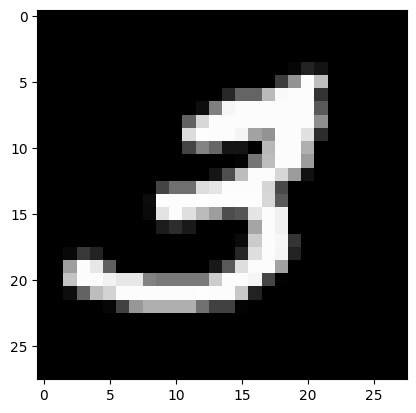

Prediction:  [2]
Label:  2


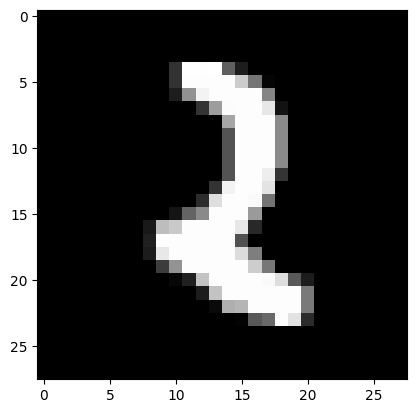

Prediction:  [4]
Label:  4


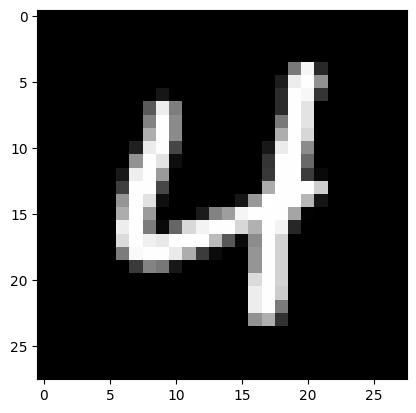

Prediction:  [4]
Label:  4


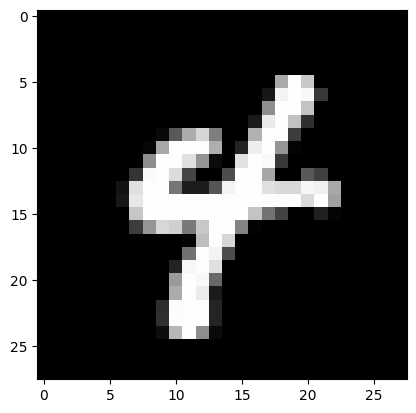

In [40]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)